In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
sns.set_palette("Dark2")
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5)

In [4]:
# versions

print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

pandas==1.5.3
numpy==1.24.2
seaborn==0.12.2
arviz==0.15.1


In [5]:
# import the data prepared in ERF_get_data

df = pd.read_csv('...')

# limit to only taxonomists, and create another df with the full dataset

df2 = df.copy()
df = df.loc[df['taxonomist?'] == 'taxonomist']

len(df)

456

We gave 4 abstracts, differing in giving extra morphological data, extra habitat data, extra mtDNA data, or no extra data at all (neutral). The figures below give the results for 'do you agree with the abstract' and 'would you accept it for a conference presentation?' in general and comparing various groups of respondents.

# Variables and categories used for the analysis

In [6]:
demo = ['taxonomist?', 'professional',
       'Country', 'specialization', 'broad_reader', 'experience', 'species_concepts', 'continent']
agree = ['c1_agree', 'c2_agree','c3_agree']
accept = ['c1_accept','c2_accept','c3_accept']
cases = ['condition_c1','condition_c2','condition_c3']
demo2 = ['taxonomist?','professional','specialization','broad_reader','experience','species_concepts']
lacking = ['c2_lack_morph', 'c2_lack_dna', 'c2_lack_hab','c2_lack_other']

# dictionary for titles
q_dct = {'condition_c1': 'Condition plant case','condition_c2':'Condition frog case','condition_c3':'Condition flatworm case',
        'c1_agree':'Agreement plant case','c2_agree':'Agreement frog case','c3_agree':'Agreement flatworm case'}


# Main data

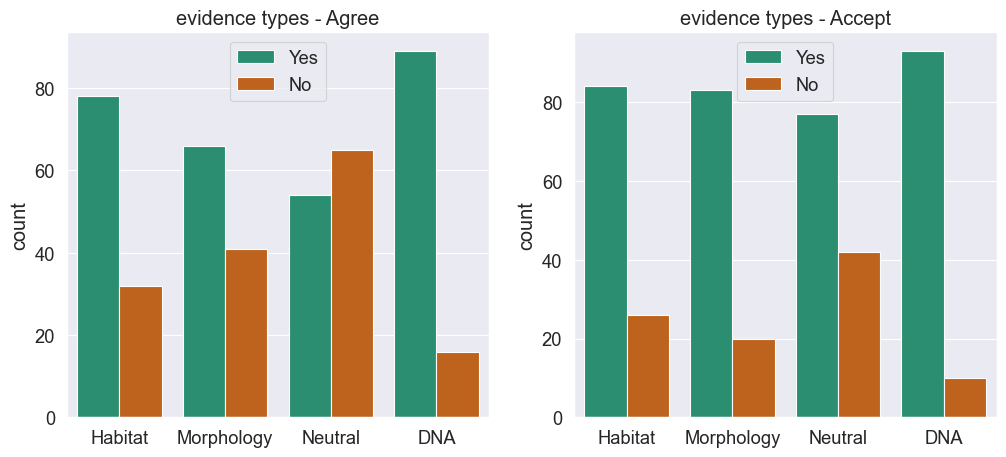

In [7]:
# agree and accept

fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

sns.countplot(data = df.loc[df.condition_c2 != 'No response'], x = 'condition_c2', hue = 'c2_accept', ax =ax[1])
ax[1].set_title('evidence types - Accept')

sns.countplot(data = df.loc[df.condition_c2 != 'No response'], x = 'condition_c2', hue = 'c2_agree', ax =ax[0])
ax[0].set_title('evidence types - Agree')

ax[0].set_xlabel('')
ax[0].legend(['Yes','No'])
ax[1].set_xlabel('')
ax[1].legend(['Yes','No'])

plt.show()

In [8]:
ct = pd.crosstab(df.loc[df.condition_c2 != 'No response']['condition_c2'],  df.loc[df.condition_c2 != 'No response']['c2_agree'])
ct['summed'] = ct.sum(axis = 1)
ct['agreement'] = np.where(ct.no > ct.yes, ct.yes / ct.summed, ct.no / ct.summed)

print(f'mean disagreement for case 2: {ct.agreement.mean()}')
ct

mean disagreement for case 2: 0.3200622814971358


c2_agree,no,yes,summed,agreement
condition_c2,,,,
DNA,16,89,105,0.152381
Habitat,32,78,110,0.290909
Morphology,41,66,107,0.383178
Neutral,65,54,119,0.453782


If they responded 'no' to 'do you agree?', we asked them what data they think were lacking, each time giving all the options that were not in the abstract they got. I haven't properly looked at these results yet, but the overall counts are below. Respondents could also say 'other' to that question, and had a free text field to explain. The responses are listed below.

In [9]:
# lacking

df[lacking[:-1]].dropna().sum()

c2_lack_morph    40.0
c2_lack_dna      50.0
c2_lack_hab      38.0
dtype: float64

In [10]:
# responses for the free comment field ('What is lacking?')

for i in df.loc[(df.c2_lack_other.notna()) & (df.c2_lack_other != '0')].c2_lack_other.values:
    print(i)
    print(' ')

number of specimens investigated (variation)
 
quantitative or structural diagnostic differences,not only "larger", "brighter"  or "less projecting".Further, evidence that observed larvae are conspecific (probably based on DNA)
 
Differences to other taxa that are not so closely linked to mimesis/mimicry and in case of the abdominal sucker functional morphology.
 
Bioacoustic evidence that reproductive calls are different
 
More detailed morphological information (e.g. osteological)
 
either of the above, but the issue is that the differences seem related to a complex of genes, indicating high probability of this being clinal variation.  
 
figures
 
A discussion of other species in the genus that are potentially sympatric.
 
collection of possible intermediates
 
evidence that the size differences are not due to a difference in ploidy level.
 
Authors should not search for differences, but distinctiveness of a newly proposed taxon. The distinctiveness must be hypothesised following a 

# Agree & Accept

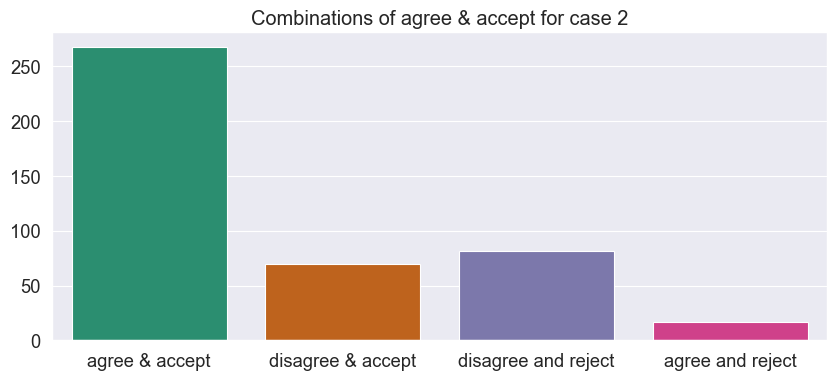

In [11]:
fig, ax = plt.subplots(figsize = (10,4))

df['c2AgAc'] = (df['c2_agree']) + (df['c2_accept'])

sns.countplot(data = df.loc[(df.c2_agree != 'No response') & (df.c2_accept != 'No response')],
             x = 'c2AgAc',
             ax=ax)
ax.set_xticklabels(['agree & accept','disagree & accept','disagree and reject','agree and reject'])
ax.set_title('Combinations of agree & accept for case 2')
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

# non-taxonomists

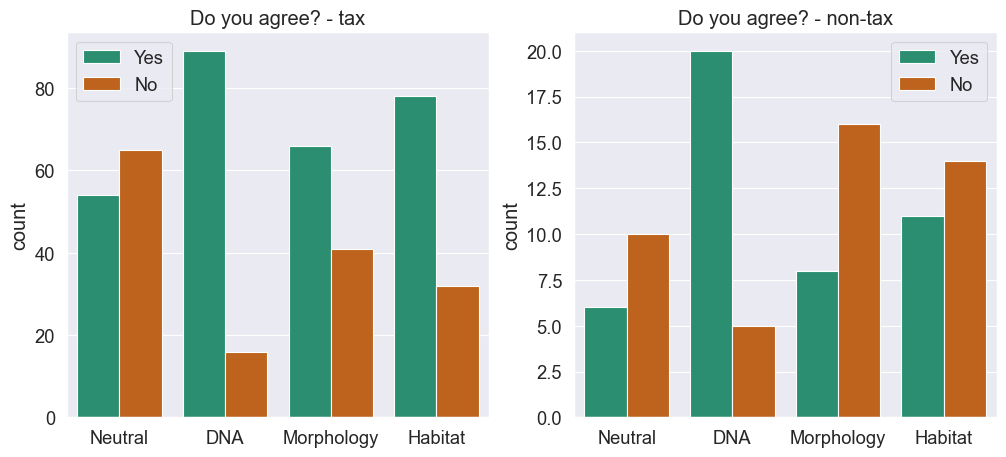

In [12]:
# agree and accept

fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

(sns.countplot(data = df2.loc[(df2.condition_c2 != 'No response') & (df2['taxonomist?'] == 'non_taxonomist')], 
               x = 'condition_c2', 
               hue = 'c2_agree',
               order = ['Neutral','DNA','Morphology','Habitat'],
               ax =ax[1]))
ax[1].set_title('Do you agree? - non-tax')

(sns.countplot(data = df2.loc[(df2.condition_c2 != 'No response') & (df2['taxonomist?'] == 'taxonomist')],
               x = 'condition_c2',
               hue = 'c2_agree', 
               order = ['Neutral','DNA','Morphology','Habitat'],
               ax =ax[0]))
ax[0].set_title('Do you agree? - tax')

ax[0].set_xlabel('')
ax[0].legend(['Yes','No'])
ax[1].set_xlabel('')
ax[1].legend(['Yes','No'])

plt.show()



# Only herpetologists

Total number of herpetologists: 34


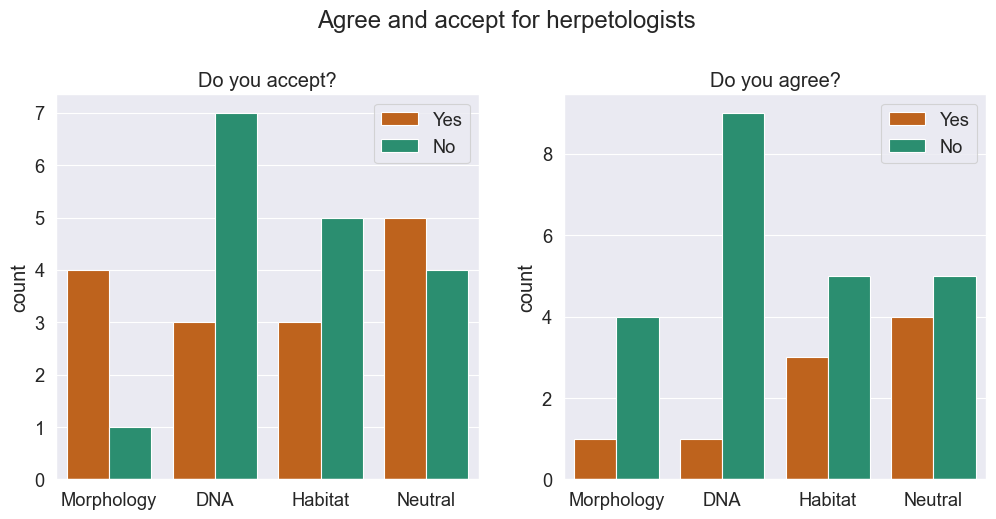

In [13]:
df3 = df.loc[df.specialization == 'Reptiles and Amphibia'].copy()

print(f'Total number of herpetologists: {len(df3)}')

fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

sns.countplot(data = df3.loc[df3.condition_c2 != 'No response'], x = 'condition_c2', hue = 'c2_accept',palette=["C1", "C0"],hue_order = ['no','yes'], ax =ax[1])
ax[1].set_title('Do you agree?')

sns.countplot(data = df3.loc[df3.condition_c2 != 'No response'], x = 'condition_c2', hue = 'c2_agree', palette=["C1", "C0"],hue_order = ['no','yes'],ax =ax[0])
ax[0].set_title('Do you accept?')

ax[0].set_xlabel('')
ax[0].legend(['Yes','No'])
ax[1].set_xlabel('')
ax[1].legend(['Yes','No'])
                
plt.suptitle('Agree and accept for herpetologists', y = 1.05)

plt.show()

In [14]:
# what's lacking accoring to herpetologists?

df2[lacking[:-1]].dropna().sum()

c2_lack_morph    51.0
c2_lack_dna      63.0
c2_lack_hab      40.0
dtype: float64

# Low vs high income for 'do you agree?'

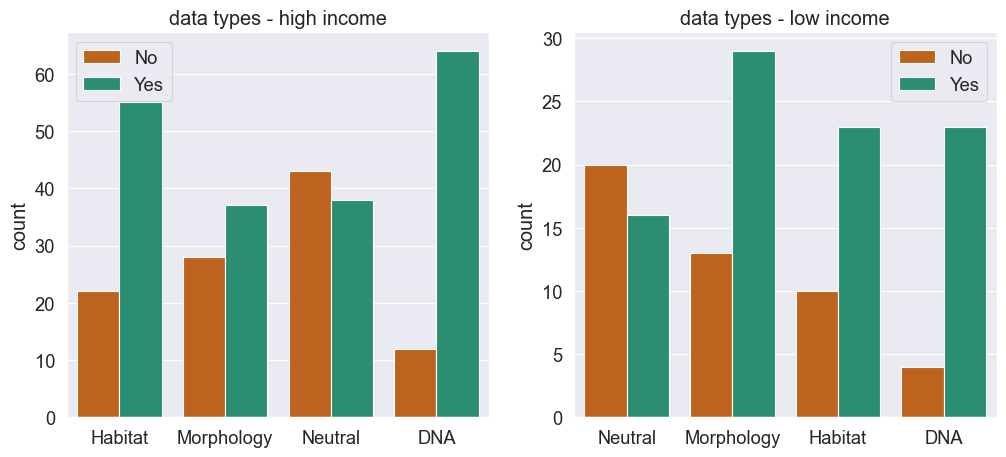

In [15]:
fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

sns.countplot(data = df.loc[(df.condition_c2 != 'No response') & (df['low_income'] == '1')], x = 'condition_c2',palette=["C1", "C0"], hue = 'c2_agree',hue_order = ['no','yes'] , ax =ax[1])
ax[1].set_title('data types - low income')

sns.countplot(data = df.loc[(df.condition_c2 != 'No response') & (df['low_income'] == '0')], x = 'condition_c2', hue = 'c2_agree', palette=["C1", "C0"],hue_order = ['no','yes'],ax =ax[0])
ax[0].set_title('data types - high income')

ax[0].set_xlabel('')
ax[0].legend(['No','Yes'])
ax[1].set_xlabel('')
ax[1].legend(['No','Yes'])

plt.show()

# Continents

## Continent groups for 'do you agree?'

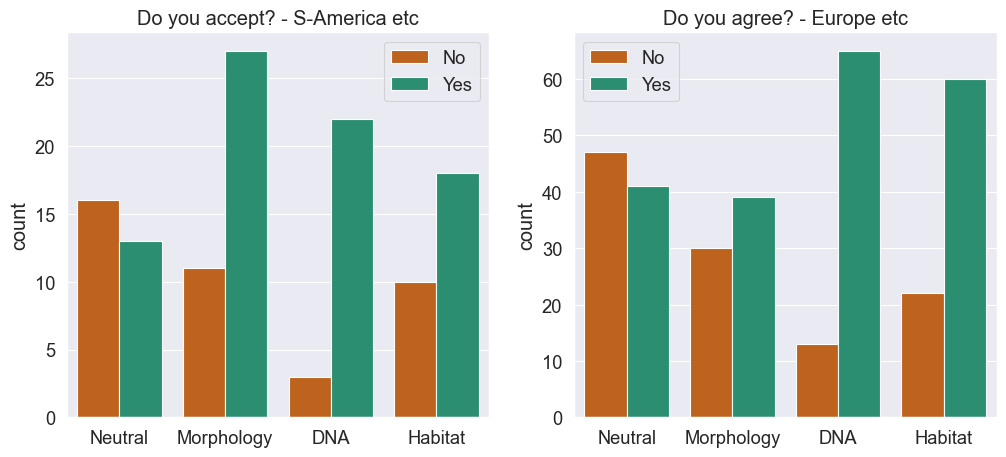

In [16]:
fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

sns.countplot(data = df.loc[(df.condition_c2 != 'No response') & 
                            ((df['continent'] == 'Europe') |
                             (df['continent'] == 'North America') | 
                            (df['continent'] == 'Oceania'))], 
              x = 'condition_c2',
              palette=["C1", "C0"], 
              order = ['Neutral','Morphology','DNA','Habitat'],
              hue = 'c2_agree',
              hue_order = ['no','yes'],
              ax =ax[1])


ax[1].set_title('Do you agree? - Europe etc')

sns.countplot(data = df.loc[(df.condition_c2 != 'No response') &
                            ((df['continent'] == 'Africa') |
                             (df['continent'] == 'South America') | 
                             (df['continent'] == 'Asia'))],
              x = 'condition_c2',
              palette=["C1", "C0"],
              order = ['Neutral','Morphology','DNA','Habitat'],
              hue = 'c2_agree',
              hue_order = ['no','yes'],
              ax =ax[0])


ax[0].set_title('Do you accept? - S-America etc')

ax[0].set_xlabel('')
ax[0].legend(['No','Yes'])
ax[1].set_xlabel('')
ax[1].legend(['No','Yes'])

plt.show()

## all continents for 'do you agree?'

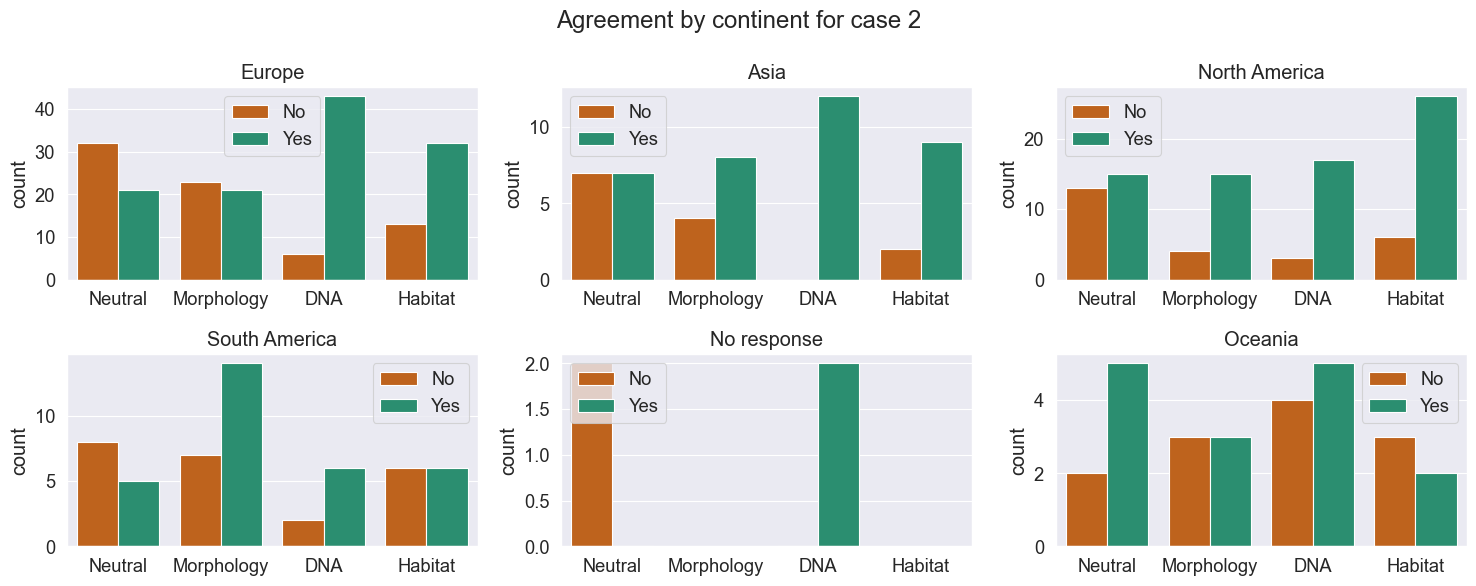

In [17]:
fig, axs = plt.subplots(2,3, figsize = (15,6))

for ax, col in zip(axs.flat, df.continent.unique()):

    sns.countplot(data = df.loc[(df.condition_c2 != 'No response') &
                                (df['continent'] == col)],
                  order = ['Neutral','Morphology','DNA','Habitat'],
                  x = 'condition_c2',
                  palette=["C1", "C0", 'C2'],
                  hue = 'c2_agree', 
                  hue_order= ['no','yes'],
                  ax =ax)
    
    ax.set_title(col)
    ax.set_xlabel('')
    ax.legend(['No','Yes'])
    
plt.suptitle('Agreement by continent for case 2')



fig.tight_layout()

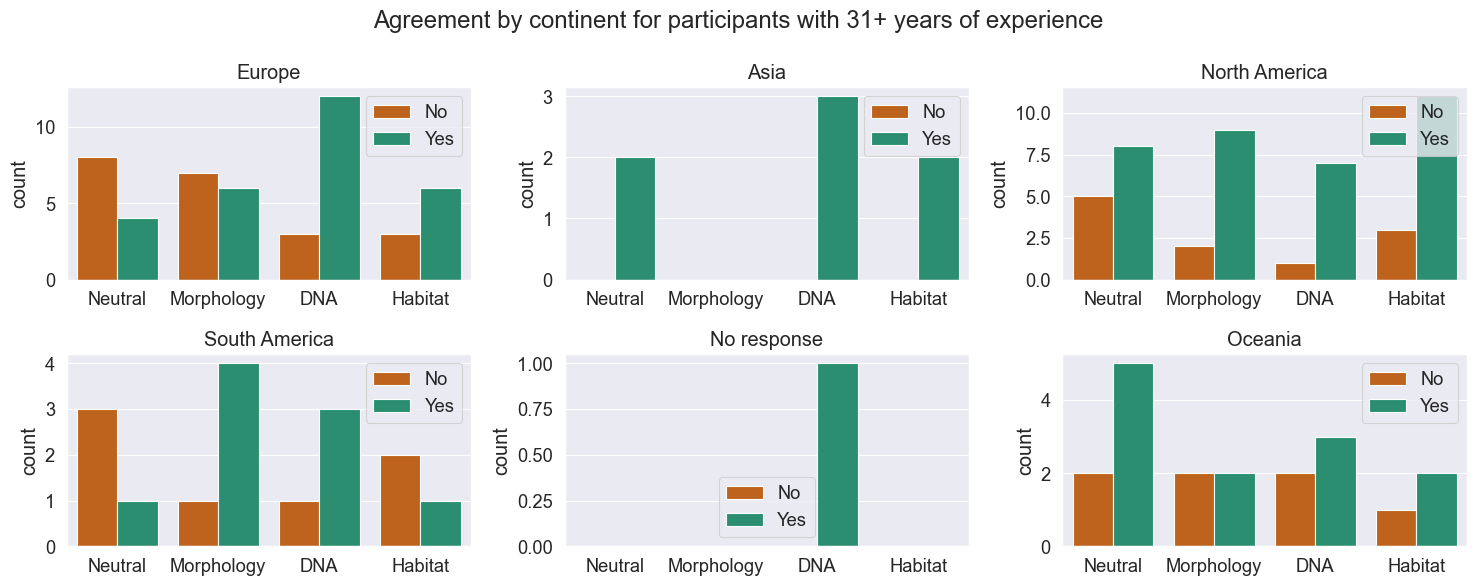

In [18]:
# check old europeans

fig, axs = plt.subplots(2,3, figsize = (15,6))

for ax, col in zip(axs.flat, df.continent.unique()):

    sns.countplot(data = df.loc[(df.condition_c2 != 'No response') &
                                (df['continent'] == col) &
                               (df.experience == '31+')],
                  order = ['Neutral','Morphology','DNA','Habitat'],
                  x = 'condition_c2',
                  palette=["C1", "C0", 'C2'],
                  hue = 'c2_agree', 
                  hue_order= ['no','yes'],
                  ax =ax)
    
    ax.set_title(col)
    ax.set_xlabel('')
    ax.legend(['No','Yes'])

plt.suptitle('Agreement by continent for participants with 31+ years of experience')


fig.tight_layout()

# Experience

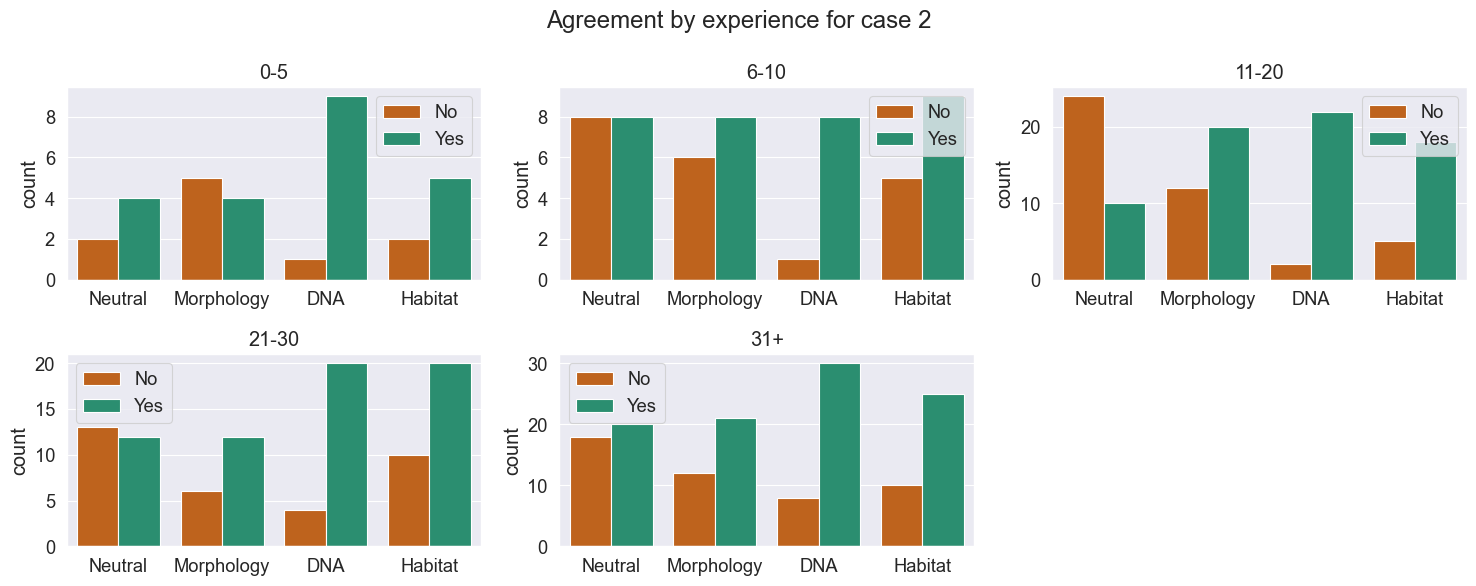

In [19]:
fig, axs = plt.subplots(2,3, figsize = (15,6))

for ax, col in zip(axs.flat, ['0-5','6-10', '11-20', '21-30', '31+']):

    sns.countplot(data = df.loc[(df.condition_c2 != 'No response') &
                                (df.experience == col)],
                  order = ['Neutral','Morphology','DNA','Habitat'],
                  x = 'condition_c2',
                  palette=["C1", "C0"],
                  hue = 'c2_agree', 
                  hue_order= ['no','yes'],
                  ax =ax)
    
    ax.set_title(col)
    ax.set_xlabel('')
    ax.legend(['No','Yes'])

axs[1,2].set_visible(False)
plt.suptitle('Agreement by experience for case 2')


fig.tight_layout()

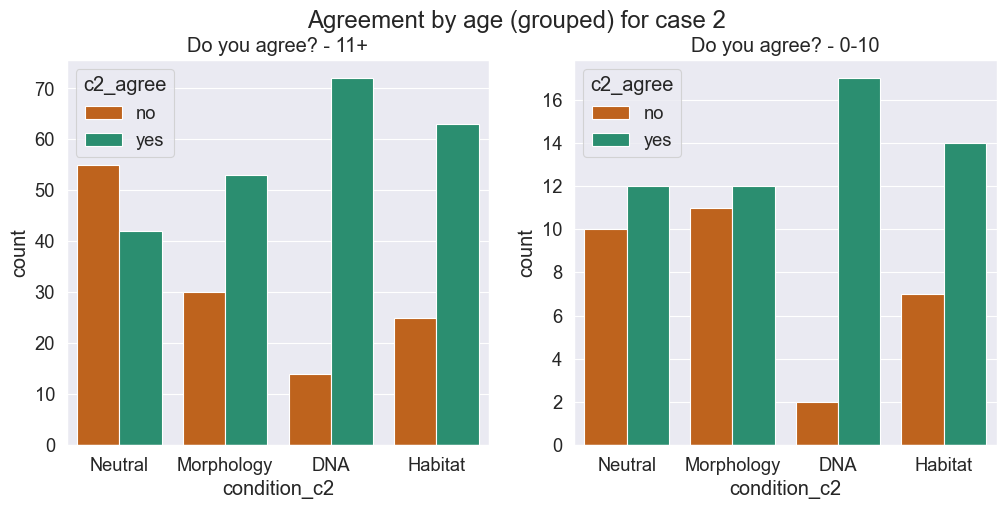

In [20]:
#age grouped

fig, ax = plt.subplots(ncols = 2, figsize = (12,5))

sns.countplot(data = df.loc[(df.condition_c2 != 'No response') &
                            ((df['experience'] == '0-5') |
                             (df['experience'] == '6-10'))],
              order = ['Neutral','Morphology','DNA','Habitat'],
                  x = 'condition_c2',
                  palette=["C1", "C0"],
                  hue = 'c2_agree', 
                  hue_order= ['no','yes'],
                  ax =ax[1])

ax[1].set_title('Do you agree? - 0-10')

sns.countplot(data = df.loc[(df.condition_c2 != 'No response') &
                            ((df['experience'] == '11-20') |
                             (df['experience'] == '21-30') | 
                             (df['experience'] == '31+'))],
              order = ['Neutral','Morphology','DNA','Habitat'],
                  x = 'condition_c2',
                  palette=["C1", "C0"],
                  hue = 'c2_agree', 
                  hue_order= ['no','yes'],
                  ax =ax[0])

ax[0].set_title('Do you agree? - 11+')

plt.suptitle('Agreement by age (grouped) for case 2')



plt.show()

# By specialization

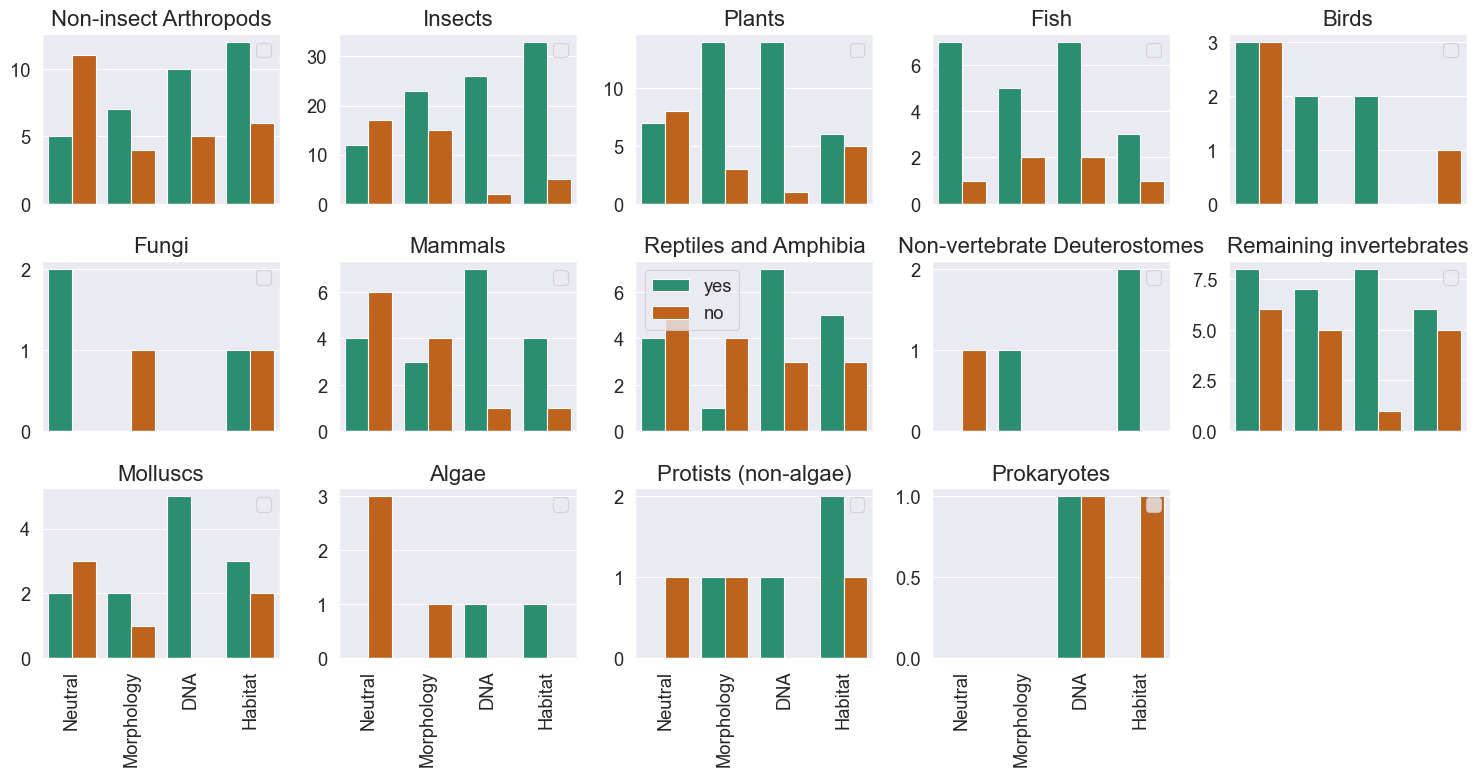

In [21]:
fig, axs = plt.subplots(3,5, figsize = (15,8), sharex = True)

specs = ['Non-insect Arthropods', 'Insects', 'Plants', 'Fish', 'Birds',
       'Fungi', 'Mammals', 'Reptiles and Amphibia',
       'Non-vertebrate Deuterostomes', 'Remaining invertebrates',
       'Molluscs', 'Algae',  'Protists (non-algae)', 'Prokaryotes']

for ax, col in zip(axs.flat,specs):

    (sns.countplot(data = df.loc[(df.condition_c2 != 'No response') & (df['specialization'] == col)],
                   x = 'condition_c2',
                   palette=["C0","C1"],
                   order = ['Neutral','Morphology','DNA','Habitat'],
                   hue = 'c2_agree',
                   hue_order= ['yes','no'],
                   ax =ax))
    ax.set_title(col, fontsize = 16)
    ax.legend('')
    ax.set_xlabel('')
    ax.set_xticklabels(['Neutral','Morphology','DNA','Habitat'], rotation = 90)
    ax.set_ylabel('')
    
axs[1,2].legend(['yes','no'])
axs[2,4].set_visible(False)

fig.tight_layout()

# By profession

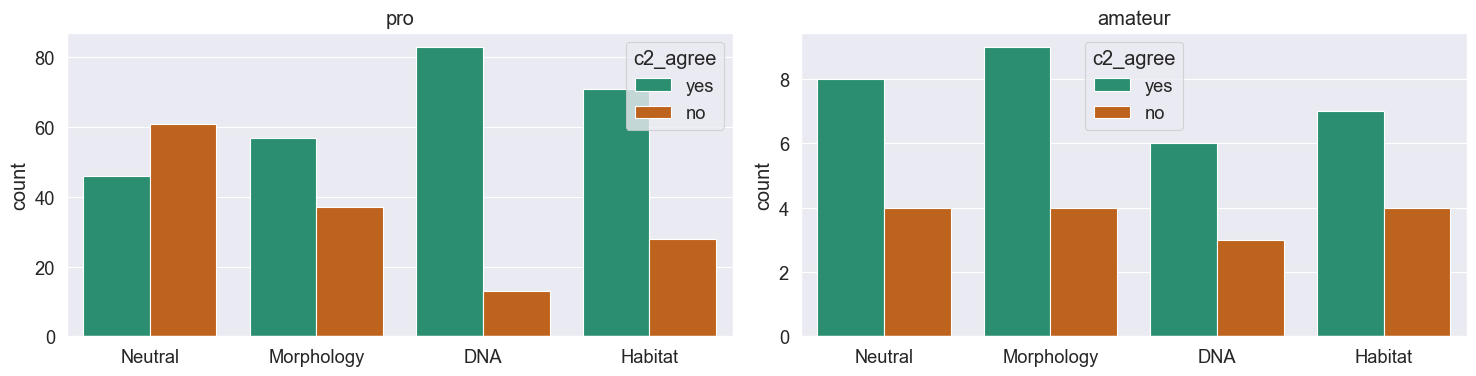

In [22]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,4))

for ax, col in zip(axs.flat, df.professional.unique()):

    sns.countplot(data = df.loc[(df.condition_c2 != 'No response') & (df['professional'] == col)],order = ['Neutral','Morphology','DNA','Habitat'], x = 'condition_c2',palette=["C0","C1"], hue = 'c2_agree',hue_order= ['yes','no'], ax =ax)
    ax.set_title(col)
    ax.set_xlabel('')

fig.tight_layout()

# By Species concept

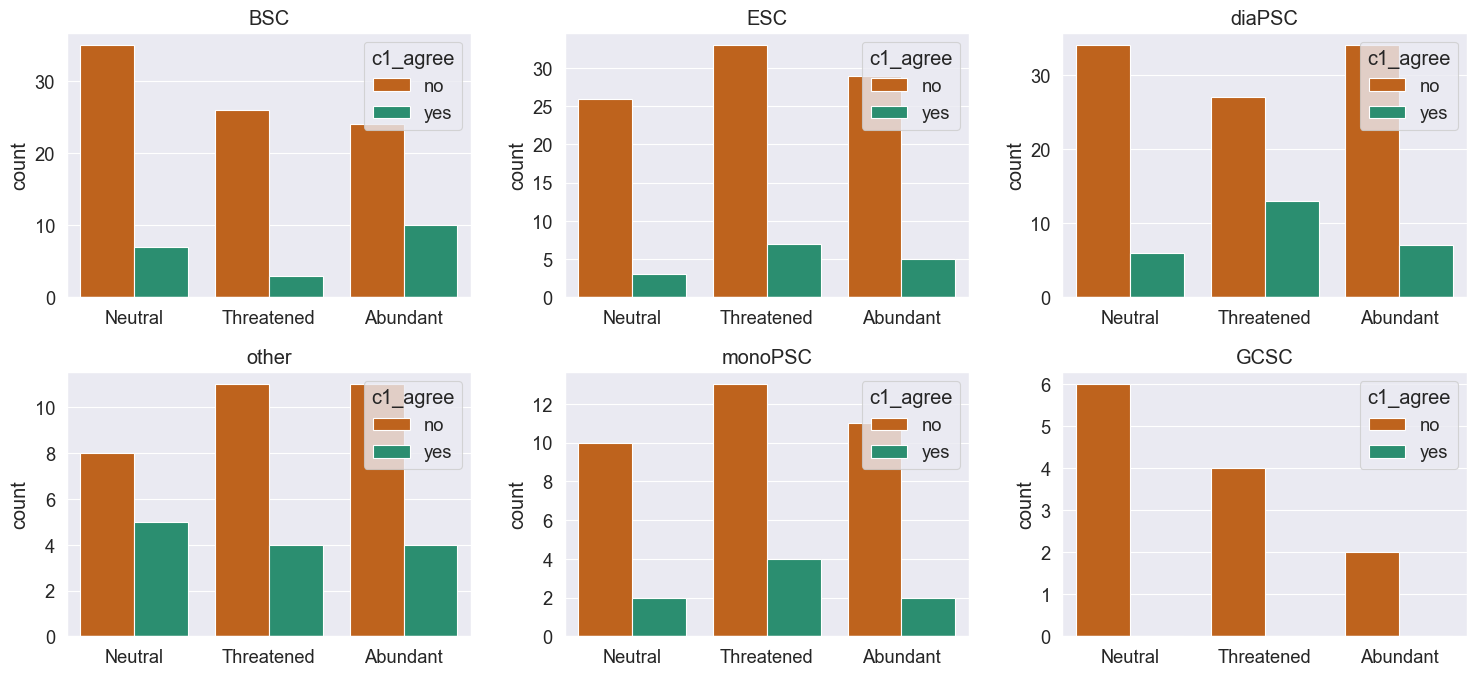

In [23]:
fig, axs = plt.subplots(2,3, figsize = (15,7))

for ax, col in zip(axs.flat, ['BSC', 'ESC', 'diaPSC', 'other', 'monoPSC', 'GCSC']):

    sns.countplot(data = df.loc[(df.condition_c1 != 'No response') & (df['species_concepts'] == col)], x = 'condition_c1',palette=["C1", "C0"],order = ['Neutral','Threatened','Abundant'], hue = 'c1_agree',hue_order= ['no','yes'], ax =ax)
    ax.set_title(col)
    ax.set_xlabel('')

fig.tight_layout()